In [262]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import nltk
from wordcloud import WordCloud, STOPWORDS

In [2]:
dataset = pd.read_excel("datasetPostAgeGenderPrediction.xlsx", engine="openpyxl")
dataset

,Message_Type,Permalink,Sentiment,Conversation_Stream_x,Created_Time,SenderScreenName,Brand,Month,Year,Hashtags,...,Comments_count,Total_engagement,Conversation_Stream_y,Status,Video_Url,Image_Url,Clean_Conversation_Stream,language,user_age,user_gender
0,Instagram,https://www.instagram.com/p/CDThourg5XW/,Positive,A very special f1 car #senna #mclaren #goodwoo...,2020-08-01 00:41:11,Instagram User,McLaren,8,2020,"senna, mclaren, goodwoodfestivalofspeed, nikon...",...,0,3,A very special f1 car #senna #mclaren #goodwoo...,processed,NaN,https://instagram.fgye6-1.fna.fbcdn.net/v/t51....,A very special f1 car,English,greater than 55,male
1,Instagram,https://www.instagram.com/p/CDU8hV-hRTB/,Neutral,Lando sporting that perm blowout in A galaxy f...,2020-08-01 00:57:23,Instagram User,McLaren,8,2020,NaN,...,1,16,Lando sporting that perm blowout in A galaxy f...,processed,NaN,https://instagram.fgye6-1.fna.fbcdn.net/v/t51....,Lando sporting that perm blowout in A galaxy f...,English,less than 21,male
2,Instagram,https://www.instagram.com/p/CDU9d-KFoC4/,Neutral,#스파르코 #sparco #f1 #landonorris #iamsparco,2020-08-01 01:02:05,Instagram User,McLaren,8,2020,"스파르코, sparco, f1, landonorris, iamsparco",...,0,49,#스파르코 #sparco #f1 #landonorris #iamsparco,processed,NaN,https://instagram.fgye6-1.fna.fbcdn.net/v/t51....,NaN,un,unknown,unknown
3,Instagram,https://www.instagram.com/p/CDVfus5Bfgp/,Positive,"El piloto británico, Lando Norris, informó que...",2020-08-01 06:02:03,Instagram User,McLaren,8,2020,"londonorris, formulauno, formula1, f1, formula...",...,0,18,"El piloto británico, Lando Norris, informó que...",processed,NaN,https://instagram.fgye6-1.fna.fbcdn.net/v/t51....,El piloto británico Lando Norris informó que u...,Spanish,unknown,unknown
4,Instagram,https://www.instagram.com/p/CDVg2t6l6jz/,Neutral,#mclaren #f1 #mclarenf1 #supercars #supercar #...,2020-08-01 06:12:02,Instagram User,McLaren,8,2020,"mclaren, f1, mclarenf1, supercars, supercar, e...",...,2,126,#mclaren #f1 #mclarenf1 #supercars #supercar #...,processed,NaN,https://instagram.fgye6-1.fna.fbcdn.net/v/t51....,NaN,un,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,Instagram,https://www.instagram.com/p/CE41bCfhyiL/,Neutral,🤔 PREGUNTA: ¿EN QUÉ PELÍCULA SALIÓ EL QUE LO I...,2020-09-08 19:59:08,Instagram User,McLaren,9,2020,"supra, car, ferrari, lamborghini, mclaren, bug...",...,0,9,🤔 PREGUNTA: ¿EN QUÉ PELÍCULA SALIÓ EL QUE LO I...,processed,NaN,https://instagram.fgye6-1.fna.fbcdn.net/v/t51....,🤔 PREGUNTA ¿EN QUÉ PELÍCULA SALIÓ EL QUE LO IN...,Spanish,unknown,unknown
2291,Instagram,https://www.instagram.com/p/CE40pZBjGw5/,Neutral,The future of F1 🤩\n—\nlandonorris \n#f1 #land...,2020-09-08 20:24:35,Instagram User,McLaren,9,2020,"f1, landonorris, landonorris4",...,0,3,The future of F1 🤩_x000D_\n—_x000D_\nlandonorr...,processed,NaN,https://instagram.fgye6-1.fna.fbcdn.net/v/t51....,The future of F1 🤩 — landonorris,English,less than 21,male
2292,Instagram,https://www.instagram.com/p/CE44wxDn1x9/,Neutral,ALTERNATE HISTORY: Manor Rebellion Racing\n\nW...,2020-09-08 20:29:02,Instagram User,McLaren,9,2020,"rebellionracing, gtsport, livery, f1, teammgr86",...,0,7,ALTERNATE HISTORY: Manor Rebellion Racing_x000...,processed,NaN,https://instagram.fgye6-1.fna.fbcdn.net/v/t51....,ALTERNATE HISTORY Manor Rebellion Racing When ...,English,less than 21,male
2293,Instagram,https://www.instagram.com/p/CE5HQwLJy1h/,Neutral,That car..🥺\n\n#mclaren #mclarenteam #formula1...,2020-09-08 22:41:02,Instagram User,McLaren,9,2020,"mclaren, mclarenteam, formula1, TeamLikeNoOthe...",...,2,594,That car..🥺_x000D_\n_x000D_\n#mclaren #mclaren...,processed,NaN,https://instagram.fgye6-1.fna.fbcdn.net/v/t51....,That car 🥺,English,less than 21,female


# 1. Idiomas con mayor cantidad de publicaciones

In [181]:
languages_count = dataset.language.value_counts().to_frame().reset_index(level=0)
languages_count.columns = ["language", "#publications"]
languages_count

,language,#publications
0,English,1474
1,Spanish,164
2,Italian,151
3,un,131
4,Portuguese,111
...,...,...
57,Norwegian Nynorsk,1
58,Polish,1
59,Galician,1
60,Wolof,1


In [182]:
lang_publications = px.bar(
    languages_count, 
    x='language', 
    y='#publications',
    title="No. publications by language"
)
lang_publications.show()
lang_publications.write_image("images/languages_publications.eps")

In [183]:
top_10_lang_publications = px.bar(
    languages_count[:10], 
    x='language', 
    y='#publications',
    title="Top 10 no. publications by language"
)
top_10_lang_publications.show()
top_10_lang_publications.write_image("images/top_10_languages_publications.eps")

# 2. Total de publicaciones por categoría de sentimiento y subtotales para los diferentes idiomas

In [184]:
sentiment_count = dataset.Sentiment.value_counts().to_frame().reset_index(level=0)
sentiment_count.columns = ["sentiment", "#publications"]
sentiment_count

,sentiment,#publications
0,Neutral,1456
1,Positive,479
2,Uncategorized,258
3,Negative,102


In [185]:
sentiment_publications = px.bar(
    sentiment_count, 
    x='sentiment', 
    y='#publications', 
    title="No. publications by sentiment",
)
sentiment_publications.show()
sentiment_publications.write_image("images/sentiment_publications.eps")

In [186]:
sentiment_languages = dataset[["Sentiment","language","Conversation_Stream_x"]]
sentiment_languages_count = sentiment_languages.groupby(["Sentiment","language"]).count().reset_index()
sentiment_languages_count.columns = ["Sentiment", "language", "#publications"]
sentiment_languages_count

,Sentiment,language,#publications
0,Negative,Azerbaijani,1
1,Negative,Dutch,1
2,Negative,English,66
3,Negative,French,1
4,Negative,Galician,1
...,...,...,...
110,Uncategorized,Spanish,21
111,Uncategorized,Tswana,1
112,Uncategorized,Turkish,3
113,Uncategorized,un,11


In [187]:
positive_condition = sentiment_languages_count["Sentiment"]=="Positive"
positive_sentiment_languages_count = sentiment_languages_count[positive_condition][["language","#publications"]]
positive_sentiment_languages_count = positive_sentiment_languages_count.sort_values("#publications", ascending=False)
positive_sentiment_languages_count

,language,#publications
73,English,311
87,Spanish,48
80,Italian,37
83,Portuguese,20
76,German,11
69,Corsican,7
91,un,6
89,Turkish,5
72,Dutch,5
79,Indonesian,4


In [188]:
positive_sentiment_languages_publications = px.bar(
    positive_sentiment_languages_count, 
    x="language", 
    y="#publications",
    title="No. positive publications by language",
)
positive_sentiment_languages_publications.show()
positive_sentiment_languages_publications.write_image("images/positive_sentiment_publications_by_language.eps")

In [189]:
negative_condition = sentiment_languages_count["Sentiment"]=="Negative"
negative_sentiment_languages_count = sentiment_languages_count[negative_condition][["language","#publications"]]
negative_sentiment_languages_count = negative_sentiment_languages_count.sort_values("#publications", ascending=False)
negative_sentiment_languages_count

,language,#publications
2,English,66
6,Italian,16
7,Spanish,10
8,Turkish,2
10,un,2
0,Azerbaijani,1
1,Dutch,1
3,French,1
4,Galician,1
5,Greek,1


In [190]:
negative_sentiment_languages_publications = px.bar(
    negative_sentiment_languages_count, 
    x='language', 
    y='#publications', 
    title="No. negative publications by language",
)
negative_sentiment_languages_publications.show()
negative_sentiment_languages_publications.write_image("images/negative_sentiment_publications_by_language.eps")

In [191]:
neutral_condition = sentiment_languages_count["Sentiment"]=="Neutral"
neutral_sentiment_languages_count = sentiment_languages_count[neutral_condition][["language","#publications"]]
neutral_sentiment_languages_count = neutral_sentiment_languages_count.sort_values("#publications", ascending=False)
neutral_sentiment_languages_count

,language,#publications
21,English,923
62,un,112
51,Spanish,85
31,Italian,84
44,Portuguese,78
56,Tswana,40
57,Turkish,11
41,Occitan,8
27,Greek,6
26,German,6


In [192]:
neutral_sentiment_languages_publications = px.bar(
    neutral_sentiment_languages_count, 
    x='language', 
    y='#publications', 
    title="No. neutral publications by language",
)
neutral_sentiment_languages_publications.show()
neutral_sentiment_languages_publications.write_image("images/neutral_sentiment_publications_by_language.eps")

In [193]:
uncategorized_condition = sentiment_languages_count["Sentiment"]=="Uncategorized"
uncategorized_sentiment_languages_count = sentiment_languages_count[uncategorized_condition][["language","#publications"]]
uncategorized_sentiment_languages_count = uncategorized_sentiment_languages_count.sort_values("#publications", ascending=False)
uncategorized_sentiment_languages_count

,language,#publications
96,English,174
110,Spanish,21
102,Italian,14
107,Portuguese,13
113,un,11
106,Occitan,3
94,Corsican,3
112,Turkish,3
100,Hungarian,2
92,Breton,1


In [194]:
uncategorized_sentiment_languages_publications = px.bar(
    uncategorized_sentiment_languages_count, 
    x='language', 
    y='#publications', 
    title="No. uncategorized publications by language",
)
uncategorized_sentiment_languages_publications.show()
uncategorized_sentiment_languages_publications.write_image("images/uncategorized_sentiment_publications_by_language.eps")

# 3. Hashtags con mayor número de referencias (top ten) de todas las publicaciones de ig

In [213]:
hashtags = dataset["Hashtags"].dropna().to_list()
all_hashtags_references = []

for hashtag_line in hashtags:
    all_hashtags_references.extend(hashtag_line.split(", "))
    
hashtag_count = {i:all_hashtags_references.count(i) for i in all_hashtags_references}

top_10_hashtag_count = dict(Counter(hashtag_count).most_common(10))
top_10_hashtag_count

{'f1': 1430,
 'mclaren': 1250,
 'formula1': 989,
 'ferrari': 792,
 'landonorris': 622,
 'mercedes': 590,
 'formulaone': 538,
 'racing': 481,
 'lewishamilton': 478,
 'redbull': 463}

In [218]:
hashtag_count_df = pd.DataFrame(top_10_hashtag_count.items(), columns=["hashtag_name", "#references"])
top_10_hashtag = px.bar(
    hashtag_count_df,
    x="hashtag_name",
    y="#references",
    title="No. references by hashtag"
)
top_10_hashtag.show()
top_10_hashtag.write_image("images/top_10_hashtag.eps")

# 4.# de Semana (agosto y septiembre) vs número de engagement obtenido. (gráfica de líneas)

In [196]:
dataset["Week"] = dataset.Created_Time.apply(lambda date: date.strftime('%V'))
dataset[dataset.Month == 9]

,Message_Type,Permalink,Sentiment,Conversation_Stream_x,Created_Time,SenderScreenName,Brand,Month,Year,Hashtags,...,Status,Video_Url,Image_Url,Clean_Conversation_Stream,language,user_age,user_gender,day_of_month,week,Week
1796,Instagram,https://www.instagram.com/p/CEkp0pZBTEW/,Positive,Você já deve ter ouvido falar que não devemos ...,2020-09-01 00:01:48,Instagram User,McLaren,9,2020,NaN,...,processed,NaN,https://instagram.fgye6-1.fna.fbcdn.net/v/t51....,Você já deve ter ouvido falar que não devemos ...,Portuguese,unknown,unknown,36,36,36
1797,Instagram,https://www.instagram.com/p/CEksWhlj3wn/,Neutral,#CarlosSainz 😬😬😬\n#BelgianGP 🇧🇪 2020 - Race \n...,2020-09-01 00:13:02,Instagram User,McLaren,9,2020,"CarlosSainz, BelgianGP, F12020, Formula12020, ...",...,pending,https://instagram.fgye6-1.fna.fbcdn.net/v/t50....,https://instagram.fgye6-1.fna.fbcdn.net/v/t50....,😬😬😬 🇧🇪 2020 Race ⠀ 📸 Follow raphavrace motorsp...,English,greater than 55,female,36,36,36
1798,Instagram,https://www.instagram.com/p/CEkr5H3BSz6/,Neutral,#weraceasone #f1 #formula1 #italiangp #racing ...,2020-09-01 00:13:02,Instagram User,McLaren,9,2020,"weraceasone, f1, formula1, italiangp, racing, ...",...,processed,NaN,https://instagram.fgye6-1.fna.fbcdn.net/v/t51....,NaN,un,unknown,unknown,36,36,36
1799,Instagram,https://www.instagram.com/p/CEkr3X0hm_X/,Neutral,#weraceasone #f1 #formula1 #italiangp #racing ...,2020-09-01 00:13:02,Instagram User,McLaren,9,2020,"weraceasone, f1, formula1, italiangp, racing, ...",...,processed,NaN,https://instagram.fgye6-1.fna.fbcdn.net/v/t51....,NaN,un,unknown,unknown,36,36,36
1800,Instagram,https://www.instagram.com/p/CEk-G_5h8Ps/,Neutral,"Este episodio es especial, ya que hace un año ...",2020-09-01 02:47:28,Instagram User,McLaren,9,2020,"1, formula1, f1, mercedes, ferrari, motor, alp...",...,processed,NaN,https://instagram.fgye6-1.fna.fbcdn.net/v/t51....,Este episodio es especial ya que hace un año p...,Spanish,unknown,unknown,36,36,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,Instagram,https://www.instagram.com/p/CE41bCfhyiL/,Neutral,🤔 PREGUNTA: ¿EN QUÉ PELÍCULA SALIÓ EL QUE LO I...,2020-09-08 19:59:08,Instagram User,McLaren,9,2020,"supra, car, ferrari, lamborghini, mclaren, bug...",...,processed,NaN,https://instagram.fgye6-1.fna.fbcdn.net/v/t51....,🤔 PREGUNTA ¿EN QUÉ PELÍCULA SALIÓ EL QUE LO IN...,Spanish,unknown,unknown,37,37,37
2291,Instagram,https://www.instagram.com/p/CE40pZBjGw5/,Neutral,The future of F1 🤩\n—\nlandonorris \n#f1 #land...,2020-09-08 20:24:35,Instagram User,McLaren,9,2020,"f1, landonorris, landonorris4",...,processed,NaN,https://instagram.fgye6-1.fna.fbcdn.net/v/t51....,The future of F1 🤩 — landonorris,English,less than 21,male,37,37,37
2292,Instagram,https://www.instagram.com/p/CE44wxDn1x9/,Neutral,ALTERNATE HISTORY: Manor Rebellion Racing\n\nW...,2020-09-08 20:29:02,Instagram User,McLaren,9,2020,"rebellionracing, gtsport, livery, f1, teammgr86",...,processed,NaN,https://instagram.fgye6-1.fna.fbcdn.net/v/t51....,ALTERNATE HISTORY Manor Rebellion Racing When ...,English,less than 21,male,37,37,37
2293,Instagram,https://www.instagram.com/p/CE5HQwLJy1h/,Neutral,That car..🥺\n\n#mclaren #mclarenteam #formula1...,2020-09-08 22:41:02,Instagram User,McLaren,9,2020,"mclaren, mclarenteam, formula1, TeamLikeNoOthe...",...,processed,NaN,https://instagram.fgye6-1.fna.fbcdn.net/v/t51....,That car 🥺,English,less than 21,female,37,37,37


In [197]:
month_engagement = px.line(
    dataset, 
    x="Week", 
    y="Total_engagement", 
    color="Month",
    title="No. week vs total engagement"
)
month_engagement.show()
month_engagement.write_image("images/month_engagement.eps")

# 5. # de publicaciones por rango de edades para el idioma inglés 

In [198]:
age_count = dataset[dataset["language"] == "English"][["user_age","Conversation_Stream_x"]]
age_count = age_count[age_count["user_age"] != "unknown"]
age_count = age_count.groupby("user_age").count().reset_index(level=0)
age_count.columns = ["age_range", "#publications"]
age_count = age_count.sort_values("#publications", ascending=False)
age_count

,age_range,#publications
5,less than 21,500
4,greater than 55,317
1,26-35,211
2,36-45,156
3,46-55,155
0,21-25,95


In [199]:
age_publications = px.bar(
    age_count,
    x="age_range",
    y="#publications",
    title="No. publications by age range"
)
age_publications.show()
age_publications.write_image("images/age_publications.eps")

# 6. # de publicaciones por género en ingles

In [200]:
gender_count = dataset[dataset["language"] == "English"][["user_gender","Conversation_Stream_x"]]
gender_count = gender_count[gender_count["user_gender"] != "unknown"]
gender_count = gender_count.groupby("user_gender").count().reset_index(level=0)
gender_count.columns = ["gender", "#publications"]
gender_count = gender_count.sort_values("#publications", ascending=False)
gender_count

,gender,#publications
1,male,935
0,female,494


In [201]:
gender_publications = px.bar(
    gender_count,
    x="gender",
    y="#publications",
    title="No. english publications by gender"
)
gender_publications.show()
gender_publications.write_image("images/gender_publications_barplot.eps")

In [202]:
gender_publications = px.pie(
    gender_count, 
    values='#publications', 
    names='gender', 
    title='No. english publications by gender'
)
gender_publications.show()
gender_publications.write_image("images/gender_publications_piechart.eps")

# 7. Gráfico de wordcloud de las principales palabras con nombres, adjetivos y verbos de los posten inglés

In [232]:
download_punk = False
download_avg_perceptron_tagger = False

if download_punk:
    nltk.download('punkt')

if download_avg_perceptron_tagger:
    nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jpvazque/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [256]:
dataset_english = dataset.loc[dataset["language"] == "English", "Clean_Conversation_Stream"]
corpus = " ".join(dataset_english.dropna().to_list())

In [278]:
tokens = nltk.word_tokenize(corpus)
pos_tagged = nltk.pos_tag(tokens)
nouns_verbs_adjectives_filter = filter(lambda x:x[1]=="NN" or x[1]=="JJ" or x[1]=="VB",pos_tagged)
nouns_verbs_adjectives_filter_list = list(nouns_verbs_adjectives_filter)
nouns_verbs_adjectives_list = [pos_tagged[0] for pos_tagged in nouns_verbs_adjectives_filter_list]
nouns_verbs_adjectives_list

[('special', 'JJ'),
 ('f1', 'NN'),
 ('car', 'NN'),
 ('sporting', 'NN'),
 ('blowout', 'NN'),
 ('galaxy', 'NN'),
 ('inactive', 'JJ'),
 ('be', 'VB'),
 ('active', 'JJ'),
 ('week', 'NN'),
 ('f1', 'JJ'),
 ('loveee', 'NN'),
 ('fanpage', 'NN'),
 ('ricciardx', 'NN'),
 ('maxverstappen1fn', 'NN'),
 ('teamlh', 'NN'),
 ('greece', 'NN'),
 ('thinkingoflando', 'NN'),
 ('dearleclerc', 'NN'),
 ('sebakimi', 'NN'),
 ('landonorriz', 'NN'),
 ('teamfxrmula1', 'NN'),
 ('morning', 'NN'),
 ('quali', 'JJ'),
 ('dayy', 'NN'),
 ('free', 'JJ'),
 ('leader', 'NN'),
 ('leader', 'NN'),
 ('ilysmlando', 'NN'),
 ('charlesleclerc', 'NN'),
 ('fan', 'NN'),
 ('landosdrivindrivin', 'NN'),
 ('enchantedanny', 'JJ'),
 ('chxrlotte', 'NN'),
 ('siine', 'NN'),
 ('fp', 'NN'),
 ('robertshwartzmanaustria', 'NN'),
 ('charlesssleclerc16', 'NN'),
 ('vagiaaa', 'NN'),
 ('nando', 'JJ'),
 ('landolike', 'JJ'),
 ('land', 'NN'),
 ('sharledit', 'VB'),
 ('exe', 'JJ'),
 ('getty', 'JJ'),
 ('woop', 'NN'),
 ('sound', 'NN'),
 ('police', 'NN'),
 ('i', 'JJ

In [282]:
wordcloud = WordCloud(
    width = 800, 
    height = 800,
    background_color ='white',
    stopwords = "english",
    min_font_size = 10).generate(" ".join(nouns_verbs_adjectives_list))

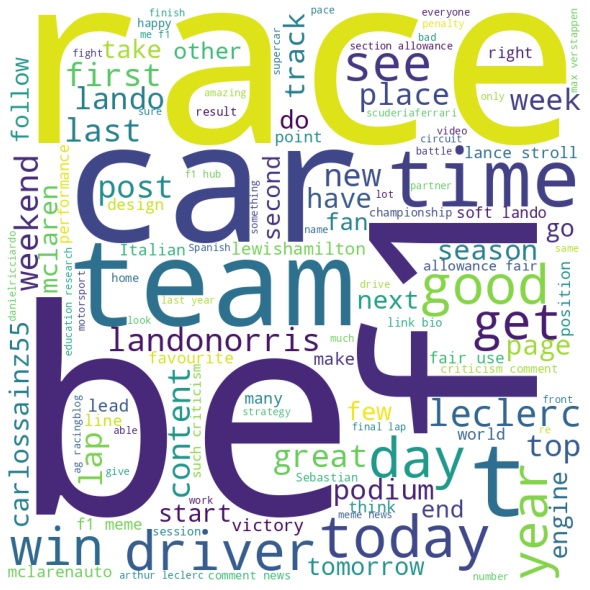

In [283]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [284]:
plt.savefig('images/wordcloud.eps', format='eps')

<Figure size 432x288 with 0 Axes>